# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
   Dataset : Heart Failure Clinical Records : https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

   merupakan dataset rekam medis dari sejumlah pasien yang mengalami gagal jantung. Data ini dikumpulkan selama masa pemantauan (follow-up) untuk melihat siapa yang bertahan hidup dan siapa yang meninggal. Dataset ini memiliki 12 faktor klinis yang mempengaruhi kondisi jantung


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os

# Konfigurasi agar plot terlihat rapi
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [19]:
# URL Dataset dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Membaca data
df = pd.read_csv(url)

# Menampilkan 5 data teratas
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [20]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [21]:
# Cek apakah ada missing value (Penting untuk laporan)
print("\nJumlah Missing Value:")
print(df.isnull().sum())


Jumlah Missing Value:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [22]:
# Cek apakah ada nilai yang berduplikasi
print("\nJumlah Duplikasi:")
print(df.duplicated().sum())


Jumlah Duplikasi:
0


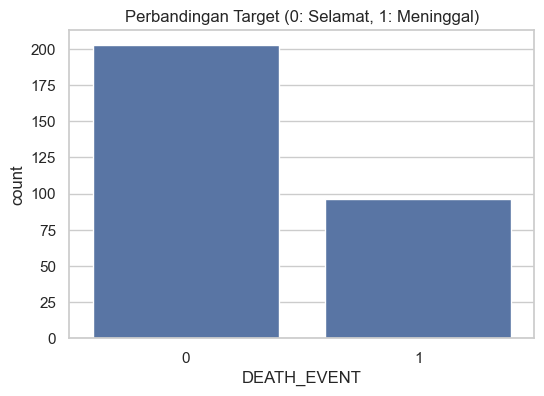

In [23]:
# Visualisasi Target (DEATH_EVENT)
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Perbandingan Target (0: Selamat, 1: Meninggal)')
plt.show()

In [24]:
# Cek Info Data (Tipe data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


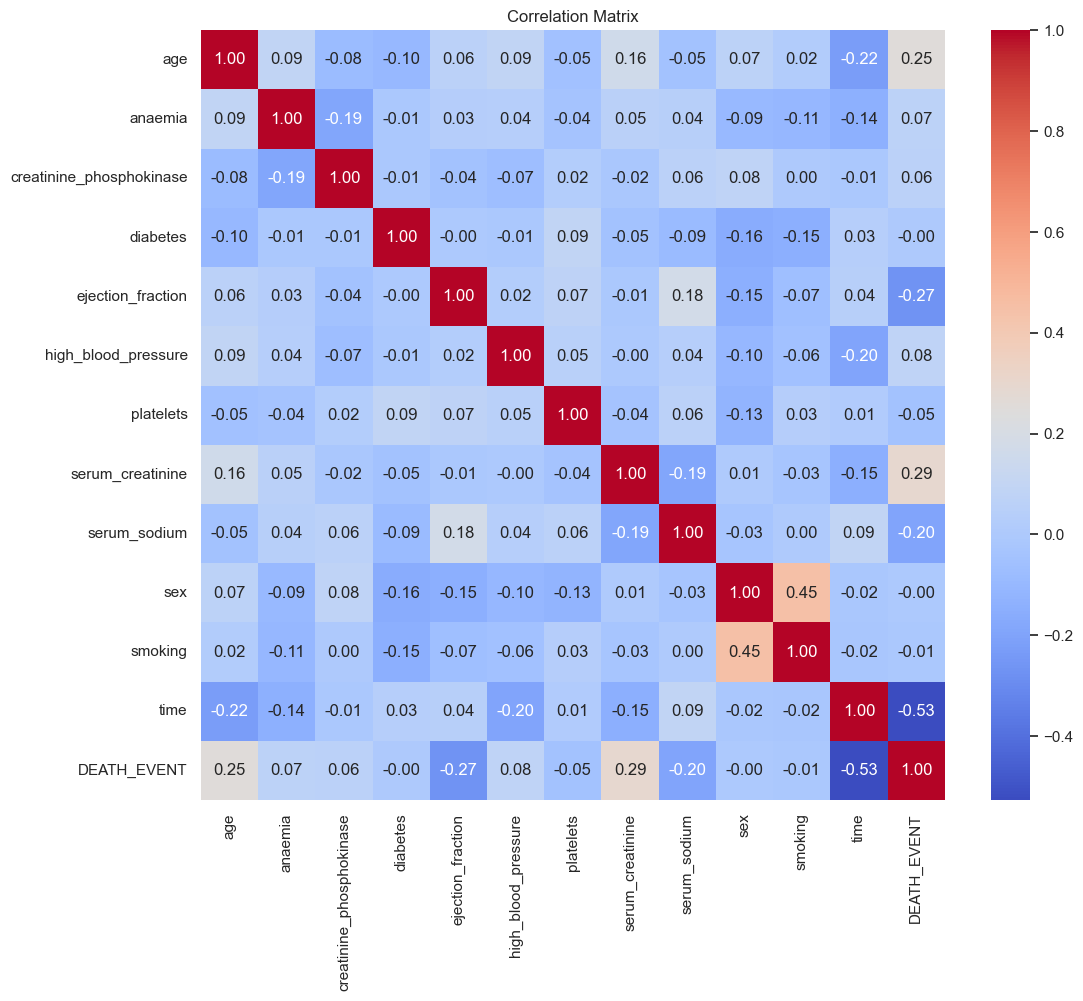

In [25]:
# Melihat Korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Faktor Risiko Utama (Korelasi Positif):Variabel serum_creatinine ($0.29$) dan age ($0.25$) memiliki hubungan positif terkuat dengan kematian (DEATH_EVENT). Artinya, semakin buruk fungsi ginjal (kreatinin tinggi) dan semakin tua usia pasien, semakin tinggi risiko kematiannya.
- Indikator Keselamatan/Bertahan Hidup (Korelasi Negatif):Variabel time ($-0.53$) dan ejection_fraction ($-0.27$) memiliki hubungan negatif terkuat. Artinya, pasien dengan waktu pemantauan (follow-up) yang lebih lama dan daya pompa jantung (ejection fraction) yang lebih tinggi memiliki risiko kematian yang lebih rendah.
- Hubungan Sex & Smoking:Terdapat korelasi positif yang cukup menonjol ($0.45$) antara sex dan smoking. Ini menunjukkan pola dalam data ini bahwa pasien berjenis kelamin laki-laki memiliki kecenderungan merokok yang jauh lebih tinggi dibandingkan pasien perempuan

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

1. tidak ada data kosong
2. tidak ada data duplikat

In [26]:
# Copy dataframe dan hapus kollom time, agar menghindari data leakage
df_clean = df.drop(columns=['time']).copy()

In [27]:
#BINNING (PENGELOMPOKAN DATA)
# Akan mengelompokkan 'age' menjadi kategori agar model lebih mudah menangkap pola umur
# Binning: <60 (Dewasa), 60-75 (Lansia), >75 (Sangat Tua)
bins = [0, 60, 75, 120]
labels = ['Adult', 'Senior', 'Elderly']
df_clean['age_category'] = pd.cut(df_clean['age'], bins=bins, labels=labels)

print("Hasil Binning (Age Category):")
print(df_clean[['age', 'age_category']].head())

Hasil Binning (Age Category):
    age age_category
0  75.0       Senior
1  55.0        Adult
2  65.0       Senior
3  50.0        Adult
4  65.0       Senior


In [28]:
# ENCODING DATA KATEGORIKAL
# Menggunakan One-Hot Encoding
df_clean = pd.get_dummies(df_clean, columns=['age_category'], prefix='age')

# Kolom 'sex', 'anaemia', dll sudah angka (0/1), jadi tidak perlu di-encode lagi.
print("Hasil Encoding (Lihat kolom age_Adult, age_Senior, dll):")
print(df_clean.head())

Hasil Encoding (Lihat kolom age_Adult, age_Senior, dll):
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  DEATH_EVENT  age_Adult  age_Senior 

In [29]:
# DETEKSI & PENANGANAN OUTLIER
Q1 = df_clean['serum_creatinine'].quantile(0.25)
Q3 = df_clean['serum_creatinine'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuang data yang diluar batas (Outlier Removal)
old_shape = df_clean.shape
df_clean = df_clean[(df_clean['serum_creatinine'] >= lower_bound) & (df_clean['serum_creatinine'] <= upper_bound)]

print(f"Penanganan Outlier: Dibuang {old_shape[0] - df_clean.shape[0]} data ekstrim.")

Penanganan Outlier: Dibuang 29 data ekstrim.


In [30]:
# SPLITTING & SCALING
X = df_clean.drop(columns=['DEATH_EVENT'])
y = df_clean['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Simpan jadi DataFrame lagi biar rapi
feature_names = X.columns
X_train_final = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_final = pd.DataFrame(X_test_scaled, columns=feature_names)

print("Ukuran Data Training:", X_train_final.shape)
print("Jumlah Fitur:", X_train_final.shape[1])
X_train_final.head()

Ukuran Data Training: (216, 14)
Jumlah Fitur: 14


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,age_Adult,age_Senior,age_Elderly
0,1.259765,-0.911322,-0.042294,-0.845154,0.197195,-0.751809,-0.014786,0.072777,0.053103,0.729325,-0.670570,-1.107612,1.290994,-0.282843
1,-0.856609,-0.911322,-0.471207,1.183216,-0.646255,1.330124,-1.206216,0.129222,-0.176301,-1.371131,1.491268,0.902843,-0.774597,-0.282843
2,-0.010059,1.097307,1.548807,1.183216,0.197195,-0.751809,0.197270,-0.435226,0.970718,-1.371131,-0.670570,0.902843,-0.774597,-0.282843
3,-0.856609,1.097307,1.598441,1.183216,-0.224530,-0.751809,-2.048307,-0.717451,1.200122,-1.371131,-0.670570,0.902843,-0.774597,-0.282843
4,-1.533849,1.097307,-0.506794,-0.845154,-0.224530,-0.751809,1.082545,-0.153002,0.511910,0.729325,1.491268,0.902843,-0.774597,-0.282843


In [33]:
output_path = "namadataset_preprocessing"
os.makedirs(output_path, exist_ok=True)


df_clean.to_csv(f"{output_path}/data_clean.csv", index=False)

train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42)
train_df.to_csv(f"{output_path}/data_train.csv", index=False)
test_df.to_csv(f"{output_path}/data_test.csv", index=False)

print("Berhasil mengekspor: data_clean.csv, data_train.csv, dan data_test.csv")

Berhasil mengekspor: data_clean.csv, data_train.csv, dan data_test.csv
